# Explore here

In [2]:
import pandas as pd

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.to_csv('../data/raw/total_data.csv')

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
list(df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

### ANALISIS UNIVARIANTE

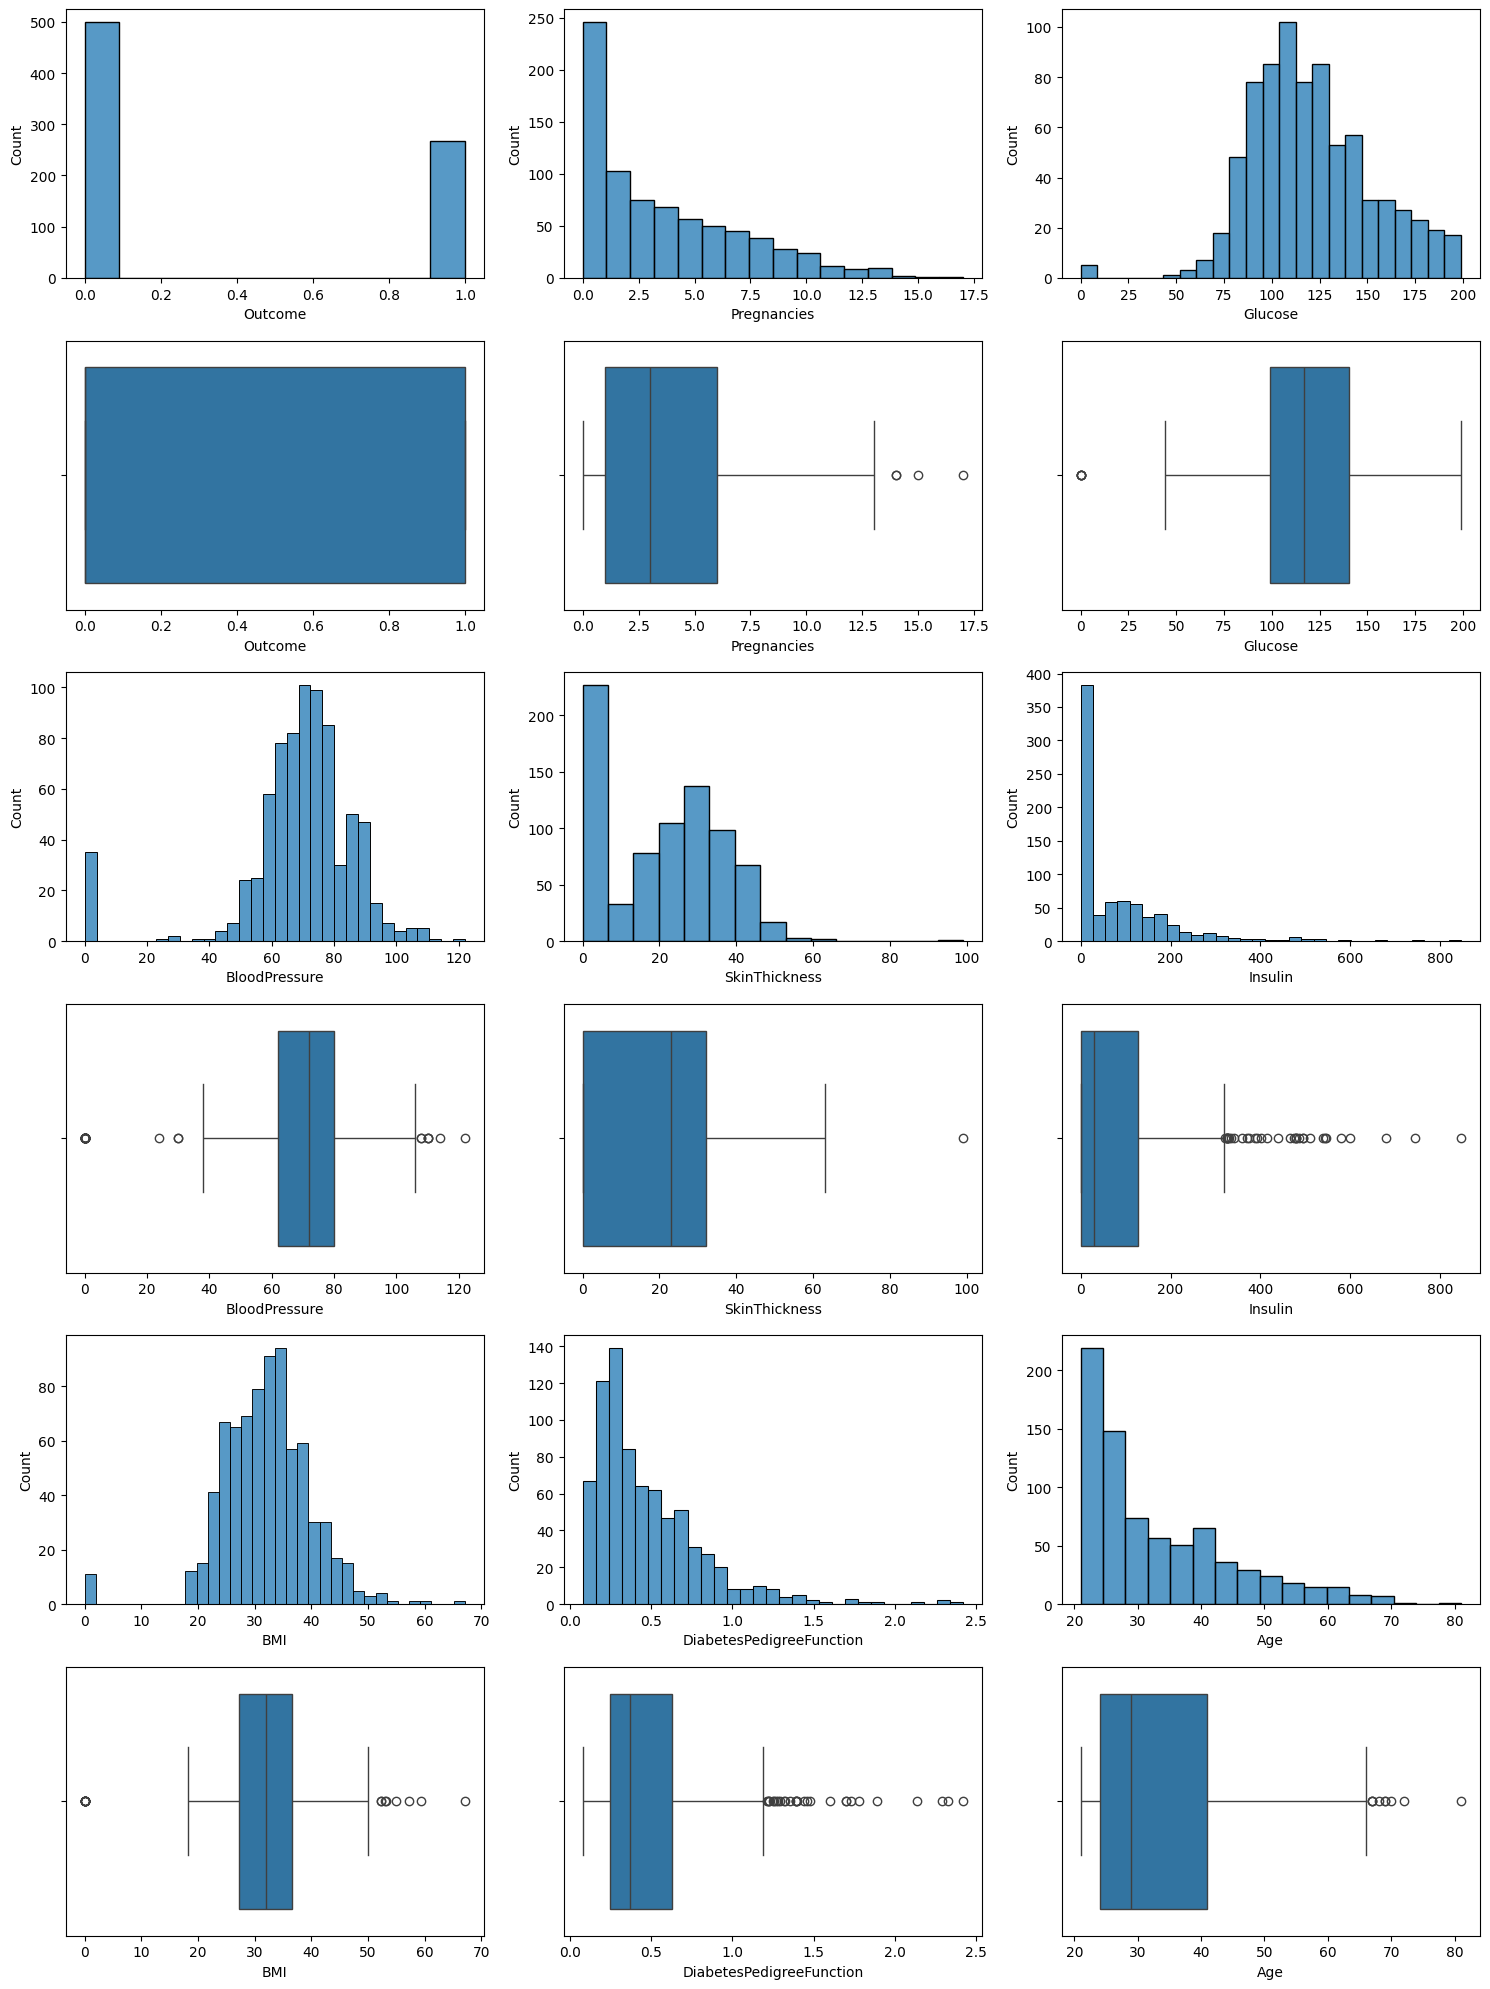

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis =plt.subplots(6,3, figsize = (15, 20))

sns.histplot(ax= axis[0, 0], data = df, x = 'Outcome')
sns.boxplot(ax= axis[1, 0], data = df, x = 'Outcome')
sns.histplot(ax= axis[0, 1], data = df, x = 'Pregnancies')
sns.boxplot(ax= axis[1, 1], data = df, x = 'Pregnancies')
sns.histplot(ax= axis[0, 2], data = df, x = 'Glucose')
sns.boxplot(ax= axis[1, 2], data = df, x = 'Glucose')
sns.histplot(ax= axis[2, 0], data = df, x = 'BloodPressure')
sns.boxplot(ax= axis[3, 0], data = df, x = 'BloodPressure')
sns.histplot(ax= axis[2, 1], data = df, x = 'SkinThickness')
sns.boxplot(ax= axis[3, 1], data = df, x = 'SkinThickness')
sns.histplot(ax= axis[2, 2], data = df, x = 'Insulin')
sns.boxplot(ax= axis[3, 2], data = df, x = 'Insulin')
sns.histplot(ax= axis[4, 0], data = df, x = 'BMI')
sns.boxplot(ax= axis[5, 0], data = df, x = 'BMI')
sns.histplot(ax= axis[4, 1], data = df, x = 'DiabetesPedigreeFunction')
sns.boxplot(ax= axis[5, 1], data = df, x = 'DiabetesPedigreeFunction')
sns.histplot(ax= axis[4, 2], data = df, x = 'Age')
sns.boxplot(ax= axis[5, 2], data = df, x = 'Age')

plt.tight_layout()
plt.show()

### ANALISIS MULTIVARIANTE

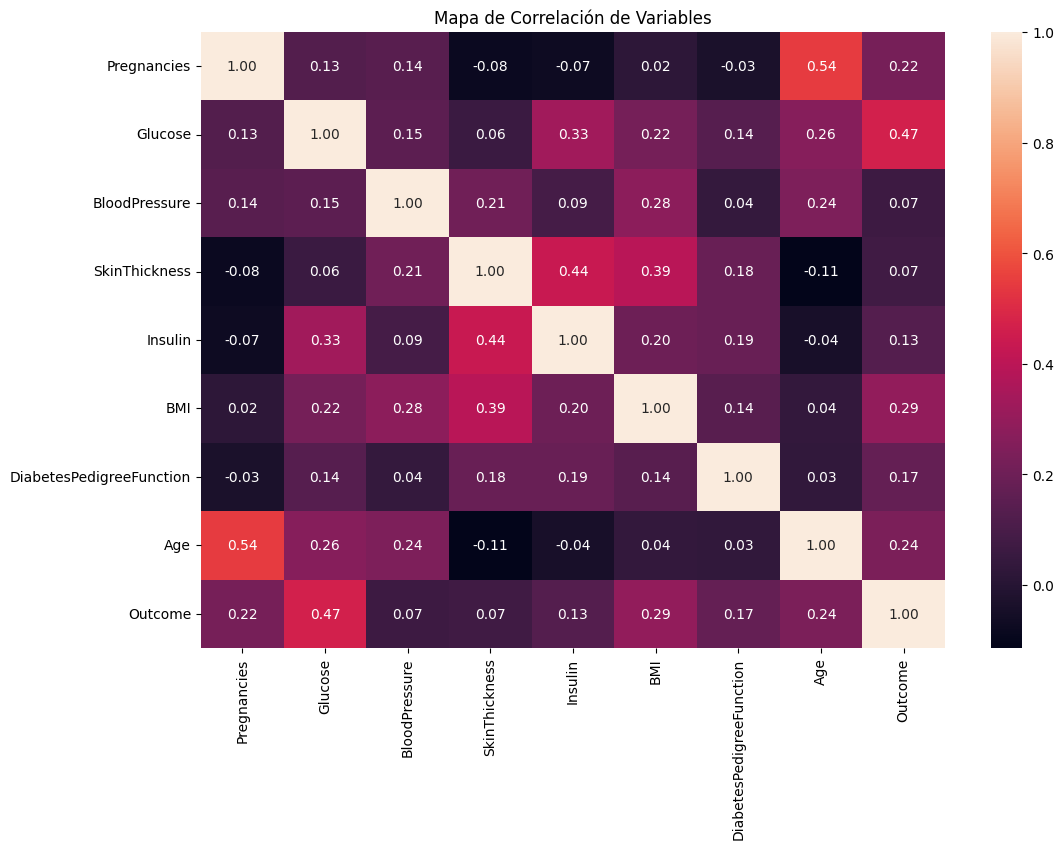

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Mapa de Correlación de Variables')
plt.show()

Podemos ver que la glucosa es quien tiene mayor relacion con el resultado, luego le sigue el BMI que es el indice de masa corporal, quiere decir que a mayor peso o mayor glucosa es mas probable que tengas diabetes.

### Ingenieria de caracteristicas

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Vemos muchos valores 0, por lo tanto vamos a reemplzarlos con la mediana

In [10]:
import numpy as np

cols_con_ceros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_con_ceros] = df[cols_con_ceros].replace(0, np.nan)

for col in cols_con_ceros:
    df[col] = df[col].fillna(df[col].median())

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.info()

<class 'pandas.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 43.2 KB


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [14]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")


Precisión del modelo: 0.76


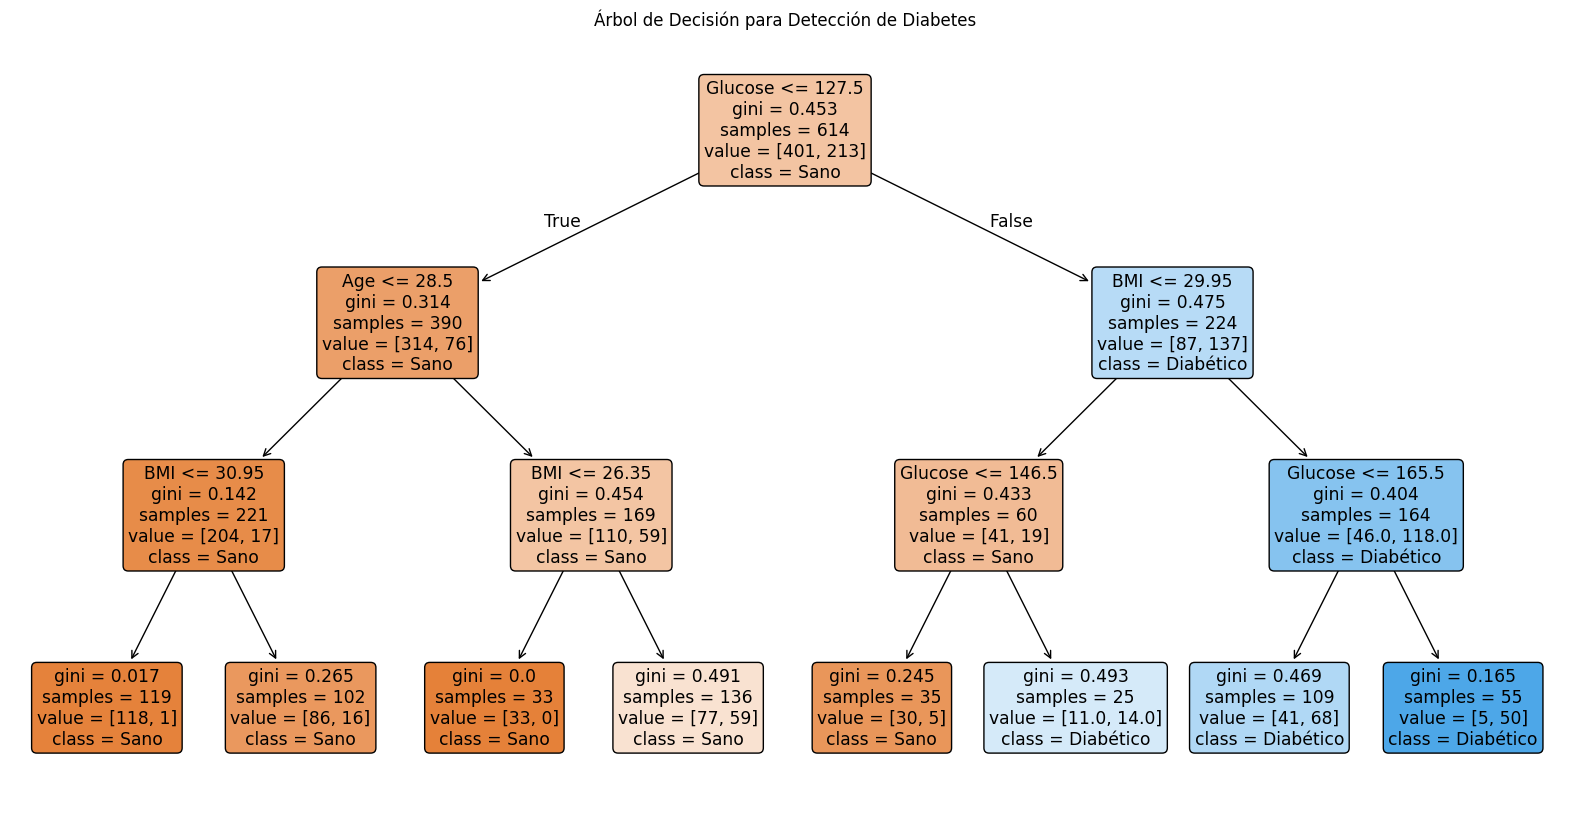

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Sano', 'Diabético'], filled=True, rounded=True)
plt.title("Árbol de Decisión para Detección de Diabetes")
plt.show()

Se puede ver que los recuadros con colores celestes y azules son diabeticos y los naranjas tiran a sano

In [16]:
model_entropy = DecisionTreeClassifier(max_depth=3,criterion='entropy')
model_log_loss = DecisionTreeClassifier(max_depth=3,criterion='log_loss')

model_entropy.fit(X_train,y_train)
model_log_loss.fit(X_train,y_train)

y_pred_entropy = model_entropy.predict(X_test)
y_pred_ll = model_log_loss.predict(X_test)

print(f'La precision usando el criterio de entropia es {accuracy_score(y_test,y_pred_entropy)}')
print(f'La precision usando el criterio de log_loss es {accuracy_score(y_test,y_pred_ll)}')

La precision usando el criterio de entropia es 0.7727272727272727
La precision usando el criterio de log_loss es 0.7727272727272727


In [17]:
importancias = pd.DataFrame({'variable': X.columns, 'importancia': model.feature_importances_})
importancias = importancias.sort_values('importancia', ascending=False)
print("\nImportancia de las variables en el árbol:")
print(importancias)


Importancia de las variables en el árbol:
                   variable  importancia
1                   Glucose     0.596625
5                       BMI     0.263305
7                       Age     0.140070
0               Pregnancies     0.000000
3             SkinThickness     0.000000
2             BloodPressure     0.000000
4                   Insulin     0.000000
6  DiabetesPedigreeFunction     0.000000


In [19]:
X_train.to_csv('../data/processed/entrenamiento_limpio.csv')
X_test.to_csv('../data/processed/test_limpio.csv')
y_train.to_csv('../data/processed/target_entrenamiento.csv', index=False)
y_test.to_csv('../data/processed/target_test.csv', index=False)